# Switzerland Weather Prediction

## 1 Project Setup and Problem Definition
This project will use observations from 10 weather stations across Switzerland to build machine learning
models that predict the temperature in Bern in 12 hours, in 24 hours and in 48 hours. 

The first step is about gaining meaningful insights into the weather patterns underlying the data. This includes, for example, understanding how different meteorological variables influence temperature in Bern and how the spatial relationships among the 10 stations contribute to forecast accuracy.

Following this, the project examines a range of machine learning methods with varying levels of complexity and interpretability
in order to identify the model that provides the most accurate temperature predictions.

The dataset is shuffled, leaving no chronological order behind. A feature indicating the date of measurement is absent. Thus, time series is no viable.

Assumption: The dataset does not provide measurement scales for the values in the different variables. As a consequence, this project assumes the normal measurement scales in the location under consideration of the magnitude of the value e.g. temperature is assumed to be measured in °C. 

## 2 Data Acquisition and Loading

### 2.1 Load required libraries and weather dataset

This section loads the basic required libraries. Furthermore, the dataset is loaded into the workbook

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Explanation of libraries:**
- pandas (pd): Used for data manipulation and analysis, especially for working with structured data like tables (DataFrames).
- numpy (np): Used for numerical operations and working with arrays/matrices, providing high-performance functions for mathematical computations.
- matplotlib.pyplot (plt): Used for creating static, interactive, and animated visualizations (plots, graphs, etc.) in Python.
- seaborn (sns): Used for statistical data visualization; it's built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

In [12]:
# load dataset: df to train the model, test for kaggle competition
df = pd.read_csv("/home/ephraim/Projects/Switzerland Weather Prediction/data/train.csv")

### 2.2 Quick look at the data

This section takes a first look at the data at hand to understand the variables etc.

In [4]:
# inspect dataset 
df.head()

,fkl010h0_ANT,fkl010h0_BAS,fkl010h0_DAV,fkl010h0_DOL,fkl010h0_GVE,fkl010h0_INT,fkl010h0_LUG,fkl010h0_SIO,fkl010h0_STG,fkl010h0_ZER,...,ure200h0_SIO,ure200h0_STG,ure200h0_ZER,tre200h0,tre200h0_lag24h,target_tre200h0_plus12h,target_tre200h0_plus24h,target_tre200h0_plus48h,hour,season
0,1.3,2.1,0.8,8.3,1.0,0.6,0.6,0.5,3.4,0.9,...,84.4,76.0,74.0,12.2,8.5,17.5,10.3,10.0,5.0,Spring
1,3.8,0.8,3.8,14.0,6.9,0.5,2.9,0.6,2.0,1.8,...,87.6,96.3,67.4,4.3,8.9,12.1,1.5,6.3,3.0,Spring
2,1.1,2.0,0.1,10.5,2.1,1.3,1.1,1.7,0.9,1.1,...,81.9,96.5,65.8,-12.3,-7.6,-7.1,-3.5,-2.1,0.0,Winter
3,0.8,3.1,1.8,9.8,1.0,1.9,0.8,0.8,0.5,0.8,...,46.4,83.9,33.7,5.6,8.2,3.2,7.4,6.5,13.0,Autumn
4,4.4,1.6,4.3,2.9,2.2,2.8,6.3,5.4,1.0,2.8,...,39.4,65.7,44.7,20.7,19.2,15.7,21.9,23.9,11.0,Summer


In [5]:
print(df.shape)
df.columns.tolist()

(7579, 92)


['fkl010h0_ANT',
 'fkl010h0_BAS',
 'fkl010h0_DAV',
 'fkl010h0_DOL',
 'fkl010h0_GVE',
 'fkl010h0_INT',
 'fkl010h0_LUG',
 'fkl010h0_SIO',
 'fkl010h0_STG',
 'fkl010h0_ZER',
 'fkl010h3_ANT',
 'fkl010h3_BAS',
 'fkl010h3_DAV',
 'fkl010h3_DOL',
 'fkl010h3_GVE',
 'fkl010h3_INT',
 'fkl010h3_LUG',
 'fkl010h3_SIO',
 'fkl010h3_STG',
 'fkl010h3_ZER',
 'gre000h0_ANT',
 'gre000h0_BAS',
 'gre000h0_DAV',
 'gre000h0_DOL',
 'gre000h0_GVE',
 'gre000h0_INT',
 'gre000h0_LUG',
 'gre000h0_SIO',
 'gre000h0_STG',
 'gre000h0_ZER',
 'pp0qffh0_BAS',
 'pp0qffh0_GVE',
 'pp0qffh0_INT',
 'pp0qffh0_LUG',
 'pp0qffh0_SIO',
 'prestah0_ANT',
 'prestah0_BAS',
 'prestah0_DAV',
 'prestah0_DOL',
 'prestah0_GVE',
 'prestah0_INT',
 'prestah0_LUG',
 'prestah0_SIO',
 'prestah0_STG',
 'prestah0_ZER',
 'rre150h0_ANT',
 'rre150h0_BAS',
 'rre150h0_DAV',
 'rre150h0_DOL',
 'rre150h0_GVE',
 'rre150h0_INT',
 'rre150h0_LUG',
 'rre150h0_SIO',
 'rre150h0_STG',
 'rre150h0_ZER',
 'sre000h0_ANT',
 'sre000h0_BAS',
 'sre000h0_DAV',
 'sre000h0_DOL

In [6]:
# count amount of hours and days
amt_hrs = df.shape[0] # 7579
amt_days = amt_hrs / 24 # 315

**Observation**: although the magnitude in time can be evaluated (7579 hours, i.e. 315 days) dataset is shuffled with no column indicating the data and thus, ARMA and other time series models cannot be used to predict temperatures

In [7]:
# compare test set to examine columns to predict: target_tre200h0_plus12h, target_tre200h0_plus24h, target_tre200h0_plus48h
test.head()

,Id,fkl010h0_ANT,fkl010h0_BAS,fkl010h0_DAV,fkl010h0_DOL,fkl010h0_GVE,fkl010h0_INT,fkl010h0_LUG,fkl010h0_SIO,fkl010h0_STG,...,ure200h0_GVE,ure200h0_INT,ure200h0_LUG,ure200h0_SIO,ure200h0_STG,ure200h0_ZER,tre200h0,tre200h0_lag24h,hour,season
0,1,8.1,1.7,4.5,13.5,6.8,2.2,0.6,0.6,4.5,...,87.1,96.2,62.5,92.6,85.7,72.9,5.5,5.9,13,Winter
1,2,0.9,1.8,1.3,3.1,0.9,1.6,0.8,0.6,0.8,...,79.3,76.4,59.4,69.4,77.4,33.7,1.9,5.5,18,Winter
2,3,2.9,2.1,0.8,5.8,0.7,0.5,1.1,0.9,4.3,...,72.7,94.3,80.1,84.2,84.5,74.5,17.7,17.5,0,Spring
3,4,5.4,2.6,3.2,5.7,5.2,2.3,0.5,8.2,1.7,...,46.1,54.7,48.4,35.6,60.2,34.8,7.5,4.4,16,Spring
4,5,0.9,0.6,1.1,1.7,0.5,0.7,0.5,0.5,0.6,...,86.5,85.9,81.7,74.3,64.2,65.6,11.7,14.6,1,Spring


In [8]:
## commented out to save space
# df.info()

**Observation**: The DataFrame available to train the models contains 7,579 entries and 92 columns, primarily of float64 data type (84 colums). The data further includes one object column (season) and seven int64 columns. It can be seen that all 92 columns have at least some missing values.

## 3 Exploratory Data Analysis

This section aims at better understanding the dataset at hand by leveraging exploratory data analysis (EDA). EDA will make us understand how the spatial and temporal features influence the target feature. The resulting meaningful insights into the weather patterns underlying the data will enable better predictions.

This exploratory data analysis examines three areas in particular: Target Analysis, Spatial Analysis, and Temporal/Feature Interaction Analysis.

#### 3.1 Missing Value Detection

In [9]:
# Check for missing values

rows_with_any_missing = df.isnull().any(axis=1)
total_rows_with_any_missing = df.isnull().any(axis=1).sum()
percentage_rows_with_any_missing = (total_rows_with_any_missing / df.shape[0]) * 100
percentage_rows_with_any_missing

np.float64(1.9791529225491489)

**Observation**: The percentage of missing values is low (1.98%). Thus, no considerable predictive power will be lost by dropping these rows in the section `4.1 Handling Missing Values`

#### 3.2 Outlier Detection

To efficiently detect and quantify outliers in numerical data without generating individual plots, this project uses the 1.5 Interquartile Range (IQR) rule. The 1.5 IQR rule states that any data point that falls 1.5 times IQR below the first quartile or above the third quartile is considered a potential outlier

In [10]:
# Implementation of the 1.5 IQR rule

# 1. Identify Numerical Columns 
# Select all columns that have a numerical data type (integer or float).
# Argument 'include=np.number' ensures only numeric types are selected.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Print summary information about the identified features.
print(f"Total numerical columns selected for outlier check: {len(numerical_cols)}")
print("First 5 numerical columns:", numerical_cols[:5])


# 2. Function for IQR Outlier Calculation

def iqr_outlier_summary(data_frame, column):
    """
    Calculates the number of outliers for a given numerical column using the 1.5*IQR rule.

    Arguments:
        data_frame (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to check for outliers.

    Returns:
        int: The total count of data points considered outliers in the specified column.
    """
    # Calculate the 25th percentile (Q1) using the quantile(0.25) argument.
    Q1 = data_frame[column].quantile(0.25)
    # Calculate the 75th percentile (Q3) using the quantile(0.75) argument.
    Q3 = data_frame[column].quantile(0.75)
    # Calculate the Interquartile Range (IQR).
    IQR = Q3 - Q1

    # Define the lower bound for outliers: Q1 - 1.5 * IQR.
    # The multiplier '1.5' is the standard threshold for the IQR method.
    lower_bound = Q1 - 1.5 * IQR
    # Define the upper bound for outliers: Q3 + 1.5 * IQR.
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers: values below the lower bound OR above the upper bound.
    outliers = data_frame[(data_frame[column] < lower_bound) | (data_frame[column] > upper_bound)]
    return len(outliers)


# 3. Apply Function and Summarize Results

outlier_counts = {}
# Iterate through the list of numerical columns.
for col in numerical_cols:
    # Pass the DataFrame 'df' and the current column name 'col' to the function.
    count = iqr_outlier_summary(df, col)
    if count > 0:
        # Store results for columns that have at least one detected outlier.
        outlier_counts[col] = count

# Convert the dictionary of outlier counts into a DataFrame for structured analysis.
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Calculate the total number of rows in the DataFrame 'df'.
total_rows = len(df)

# Calculate the percentage of outliers for each feature.
outlier_df['Outlier %'] = (outlier_df['Outlier Count'] / total_rows) * 100

# Sort the results by the 'Outlier %' column in descending order (highest first).
outlier_df = outlier_df.sort_values(by='Outlier %', ascending=False)

# 4. Display Results 

print("\n" + "="*50)
print("IQR Outlier Analysis Summary")
print("="*50)

# Display the top features with the outlier percentage above 5%. 
print("\nTop Features with Highest Outlier Percentage (using 1.5 * IQR):")
# The .to_markdown() function provides a clean, well-formatted table output.
# print all outliers above 5%, 
print(outlier_df[outlier_df["Outlier %"] > 5].to_markdown(index=False, floatfmt=".2f"))

# Display a final summary statistic.
print(f"\nTotal features checked: {len(numerical_cols)}")
print(f"Features containing at least one outlier: {len(outlier_df)}")

# NOV 11 ML PROJECT CONTINUE HERE 
# observations:
# outliers with above 5% of all values are all in the variables of sre - solar radiation, rre, gre, fkl
# - Solar Radiation sre: 0 at night, peak during the day - 


Total numerical columns selected for outlier check: 91
First 5 numerical columns: ['fkl010h0_ANT', 'fkl010h0_BAS', 'fkl010h0_DAV', 'fkl010h0_DOL', 'fkl010h0_GVE']

IQR Outlier Analysis Summary

Top Features with Highest Outlier Percentage (using 1.5 * IQR):
| Feature      |   Outlier Count |   Outlier % |
|:-------------|----------------:|------------:|
| sre000h0_INT |            1783 |       23.53 |
| sre000h0_ZER |            1782 |       23.51 |
| sre000h0_ANT |            1752 |       23.12 |
| sre000h0_STG |            1581 |       20.86 |
| sre000h0_BAS |            1578 |       20.82 |
| sre000h0_DAV |            1549 |       20.44 |
| sre000h0_GVE |            1444 |       19.05 |
| sre000h0_DOL |            1371 |       18.09 |
| rre150h0_DOL |            1353 |       17.85 |
| rre150h0_ANT |            1117 |       14.74 |
| rre150h0_STG |            1107 |       14.61 |
| rre150h0_DAV |            1022 |       13.48 |
| gre000h0_INT |             948 |       12.51 |
| rre15

**Observation:** The top features, all exhibiting outliers in over 5% of the rows, belong exclusively to weather measurements expected to show high natural variability, namely Sunshine Duration (`sre`), Precipitation (`rre`), Global Radiation (`gre`), and Wind Speed (`fkl`). Notably, Sunshine Duration measurements (`sre000h0_*`) have the highest outlier percentages, peaking at 23.53%.

The high percentage of outliers in these features requires investigation to distinguish between errors (which need correction) and natural extremes (which must be carefully considered for modeling).

When visualizing outliers using violin plots grouped by variable type in the following code cell, the expectation for natural extremes in `sre` (Sunshine Duration) and `rre` (Precipitation) is as follows:
The plots should be heavily centered around zero because these features inherently contain many zero values (`sre` at night, `rre` during dry periods).
A wider, higher distribution far from zero would suggest potential data errors or anomalies related to a specific sensor/location, as it indicates frequently high or non-zero measurements where they are not expected.

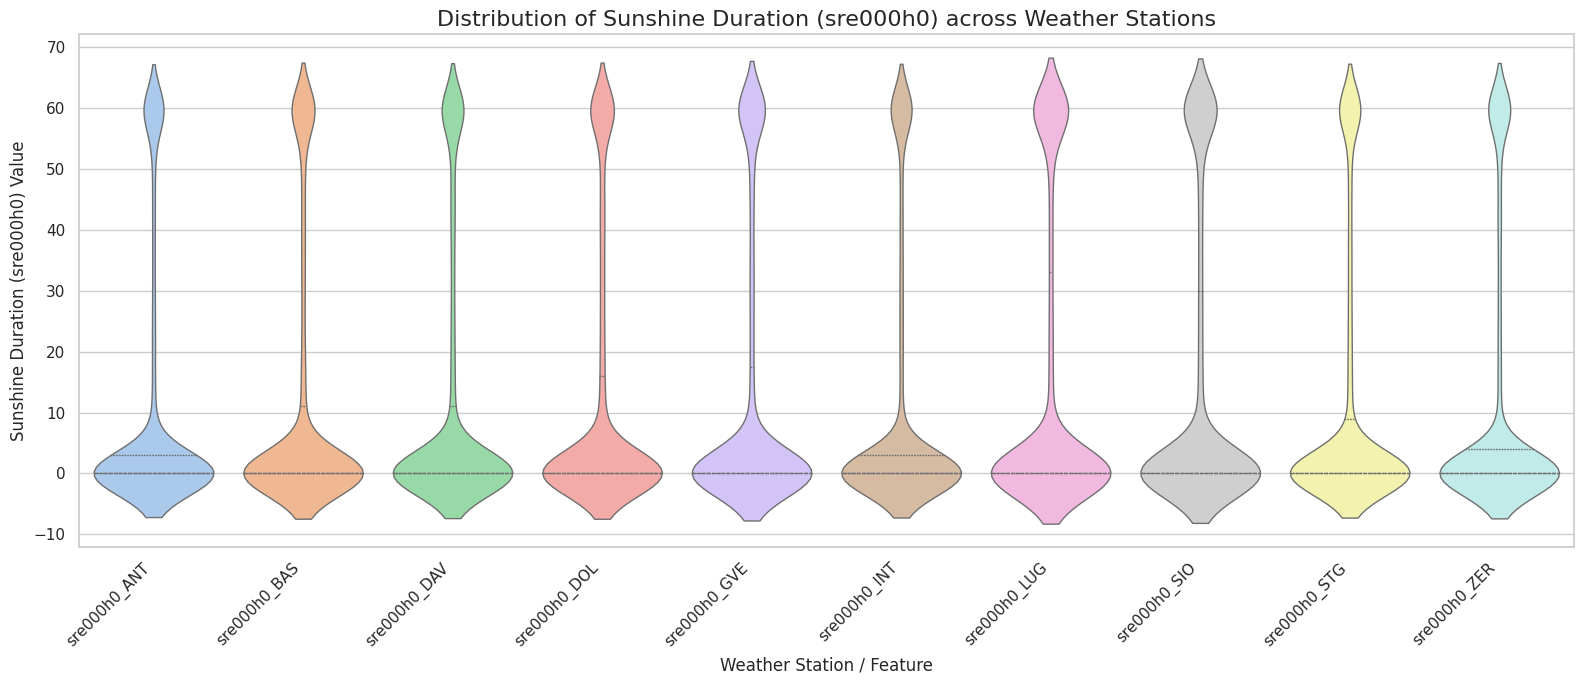

<Figure size 640x480 with 0 Axes>

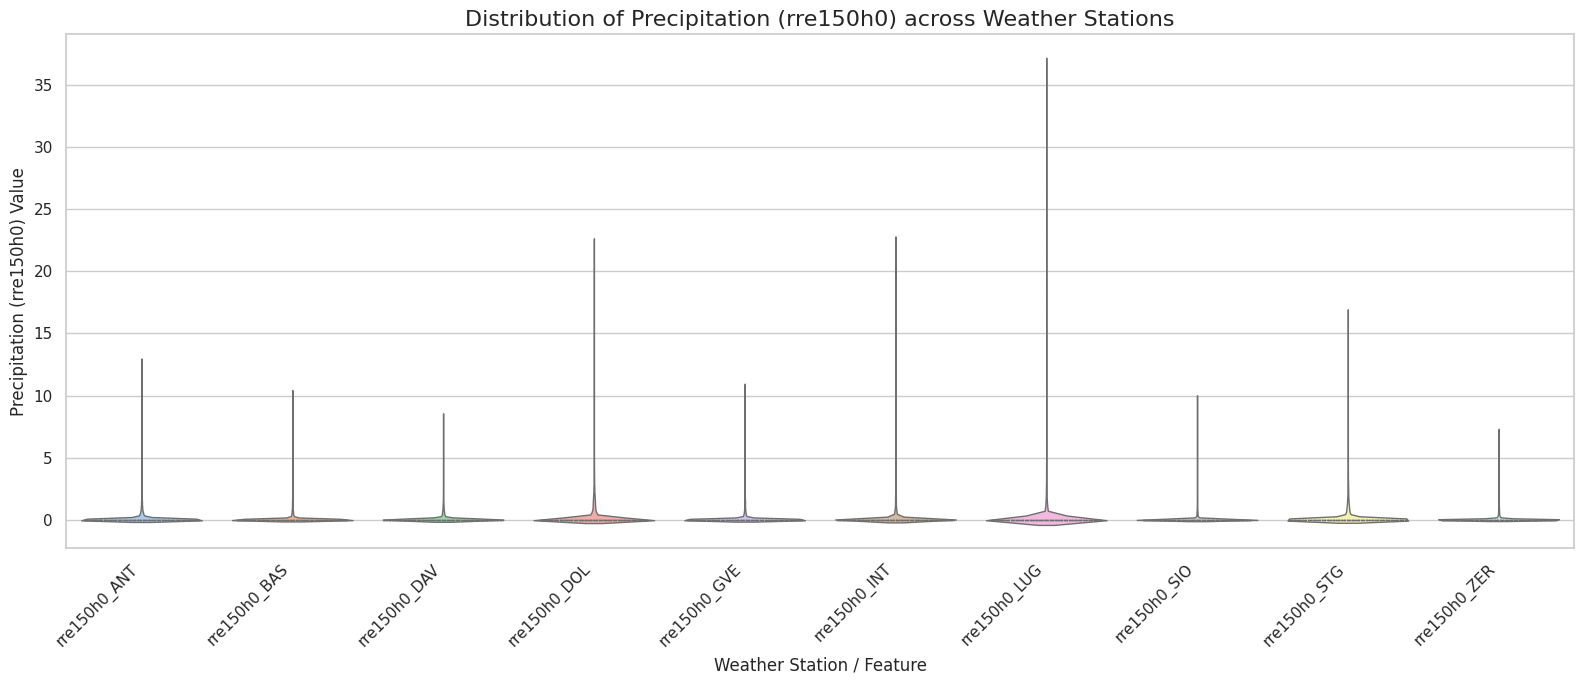

<Figure size 640x480 with 0 Axes>

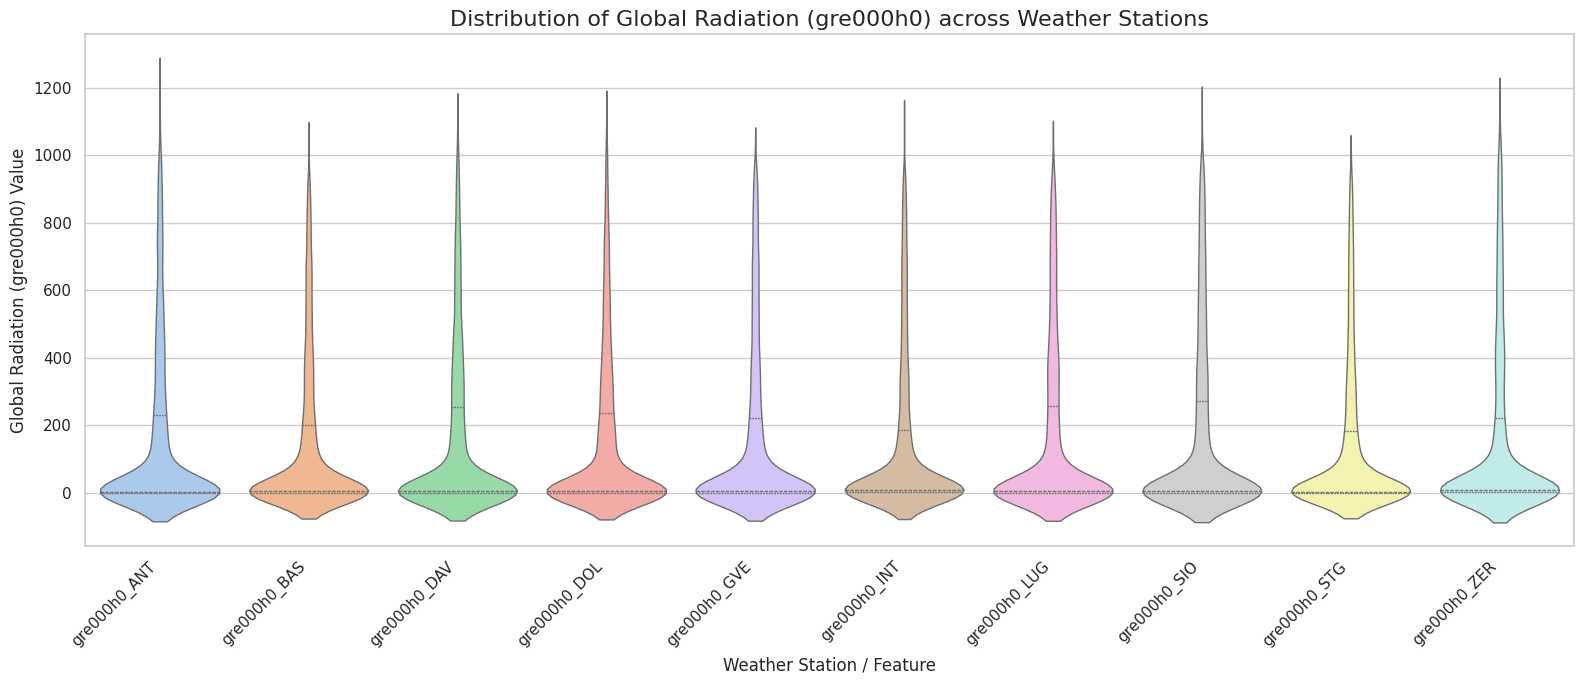

<Figure size 640x480 with 0 Axes>

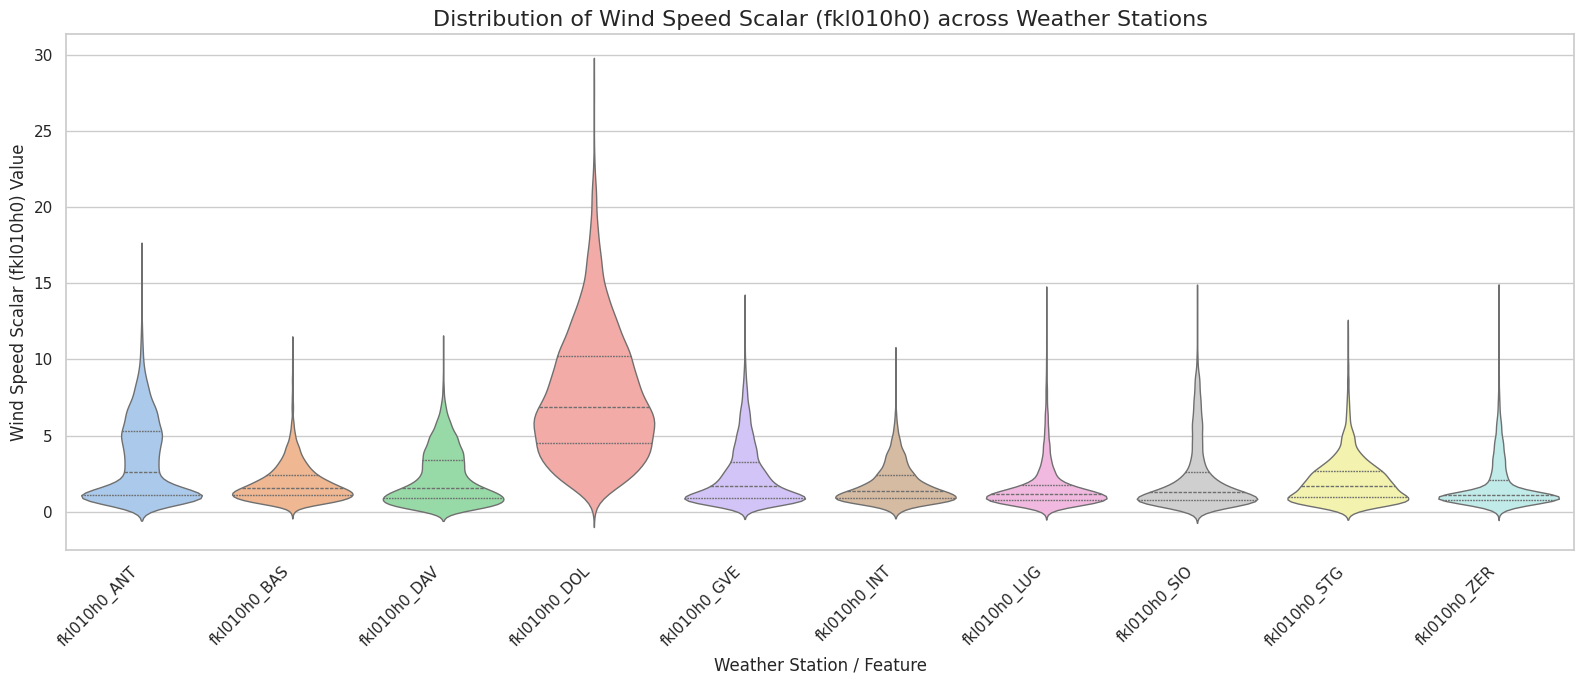

<Figure size 640x480 with 0 Axes>

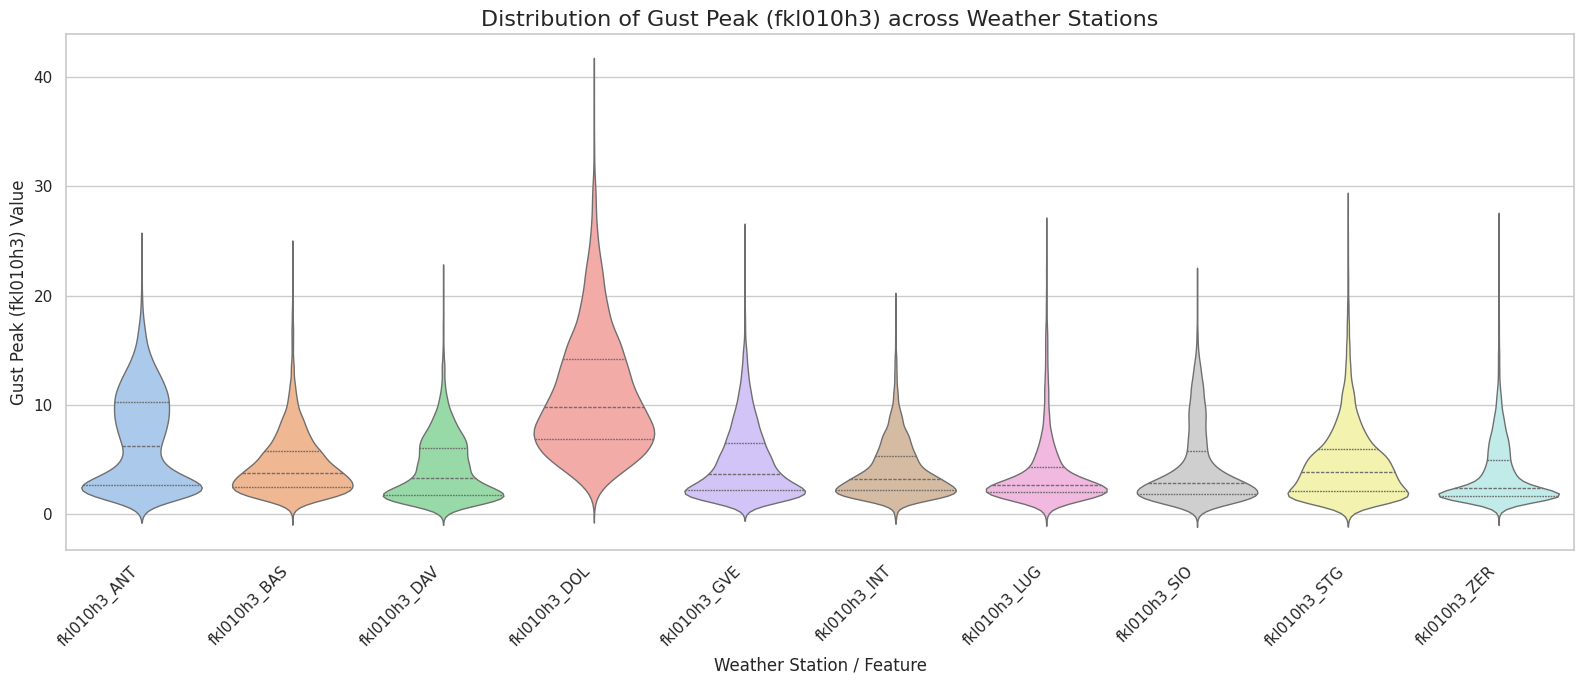

<Figure size 640x480 with 0 Axes>

In [11]:
# Grouped outlier visualization 
# Set a style for better visualization
sns.set_theme(style="whitegrid")


# 1. Define Feature Groups for Comparison 
# Identify all features belonging to the sunshine duration group (sre000h0)
sre_features = [col for col in df.columns if col.startswith('sre000h0_')]

# Identify all features belonging to the precipation group (rre150h0)
rre_features = [col for col in df.columns if col.startswith('rre150h0_')]

# Identify all features belonging to the global radiation group (gre000h0)
gre_features = [col for col in df.columns if col.startswith('gre000h0_')]

# Identify all features belonging to the wind speed scalar group ('fkl010h0)
fkl0_features = [col for col in df.columns if col.startswith('fkl010h0_')]

# Identify all features belonging to the gust peak group (fkl010h3_)
fkl3_features = [col for col in df.columns if col.startswith('fkl010h3_')]

# 2. Create the Scalable Plotting Function 
def plot_feature_group_comparison(data, feature_list, title_prefix):
    """
    Generates a combined Violin Plot and Box Plot for a group of related features 
    (e.g., same measurement across different stations).

    Arguments:
        data (pd.DataFrame): The source DataFrame.
        feature_list (list): A list of column names to plot together.
        title_prefix (str): A descriptive title for the plot.
    """
    # Melt the data to a long format, which is required for plotting multiple categories in Seaborn
    # The 'value_vars' argument specifies the columns to be melted.
    df_melted = data.melt(value_vars=feature_list, var_name='Station_Feature', value_name='Value')

    plt.figure(figsize=(16, 7))

    # Create a Violin Plot to visualize the full density distribution (shape of the data)
    sns.violinplot(
        x='Station_Feature',  # X-axis shows the different station/feature names
        y='Value',            # Y-axis shows the meteorological value
        data=df_melted,
        inner='quartile',     # Display quartiles (Q1, Median, Q3) inside the violin
        linewidth=1,
        palette="pastel",
        hue='Station_Feature', # Maps the x-variable to color
        legend=False          # Suppresses the automatic legend
    )

    plt.title(f'Distribution of {title_prefix} across Weather Stations', fontsize=16)
    plt.xlabel("Weather Station / Feature", fontsize=12)
    plt.ylabel(f"{title_prefix} Value", fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.tight_layout()
    plt.show()
    

# --- 3. Execute Visualization for Key Groups ---

# Plot the Sunshine duration group (sre000h0)
plot_feature_group_comparison(df, sre_features, "Sunshine Duration (sre000h0)")

# Plot the Precipitation group (rre150h0)
plot_feature_group_comparison(df, rre_features, "Precipitation (rre150h0)")

# Plot the global radiation group (gre000h0)
plot_feature_group_comparison(df, gre_features, "Global Radiation (gre000h0)")

# Plot the wind speed scalar group (fkl010h0)
plot_feature_group_comparison(df, fkl0_features, "Wind Speed Scalar (fkl010h0)")

# Plot the gust peak group (fkl010h3)
plot_feature_group_comparison(df, fkl3_features, "Gust Peak (fkl010h3)")

**Observation**: Violin plots for Solar Radiation (`sre`) and Precipitation (`rre`) are all highly similar across stations, characterized by density spikes near zero (bottom-heavy distribution) and thin tails stretching to higher values, confirming that these outliers are natural extremes of rare, high-intensity events (daylight/rain) or frequent zero values (night/dry). Wind Speed (`fkl`) is slightly more balanced but still bottom-heavy. 

**Conclusion on Outliers and Modeling**: Since these are natural extremes, capping is not recommended for `sre`, `gre`, and `rre`. For non-tree models (like Linear Regression or Neural Networks), Log Transformation ($\log(1+x)$) should be used to stabilize variance, while tree-based models (XGBoost/Random Forest) can handle the distribution directly. For Wind Speed (`fkl`), Capping (Winsorization) is the most effective technique for non-tree models to limit the influence of rare, high gusts.

#### 3.3 Target Analysis 

This section visualizes the 12-hour target temperature distribution to fully understand the range and central tendency of the values the model needs to predict. Further, the target analysis will inform the required activation function for a neural networks model output layer 

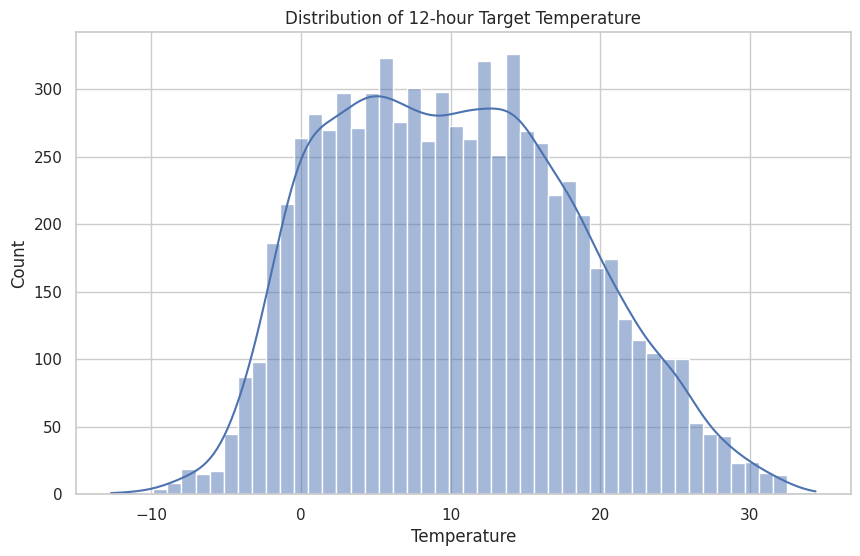

count    7577.000000
mean       10.165606
std         8.195067
min       -12.700000
25%         3.600000
50%         9.800000
75%        16.100000
max        34.400000
Name: target_tre200h0_plus12h, dtype: float64

In [14]:
# Plot the distrubution of the 12-hour target temperature 
# Purpose: Visualize the full range and shape of the temperature we are trying to predict. This informs what range of values the model will need to handle. 
# why important: What it means by "Range of Values"The "range of values" refers to the minimum and maximum possible outputs your model must be able to predict accurately, along with the common values in between.Based on our EDA for the target_tre200h0_plus12h variable, the range is from $-12.7^\circ\text{C}$ (Min) to $34.4^\circ\text{C}$ (Max).Why this Range is Important for ModelingKnowing the full range is crucial for several modeling decisions:Model Selection:Since the target is a continuous variable (temperature), this confirms you must use a regression model (e.g., Linear Regression, Random Forest Regressor, Neural Network Regression), not a classification model.Evaluation Metrics:The wide range ($47.1$ degrees) suggests that metrics which penalize large errors proportionally, like Root Mean Square Error ($\text{RMSE}$), are suitable. The wide spread (Standard Deviation of $8.2^\circ\text{C}$) tells you that a constant prediction (e.g., always predicting the mean of $10.16^\circ\text{C}$) would result in a very high error, confirming the complexity of the prediction task.Model Output Layer (Neural Networks):If you use a Neural Network, knowing the range means you should not use activation functions (like the Sigmoid function) on the final output layer, as they restrict the output to a narrow range (e.g., 0 to 1). You need an unbounded output layer (a "linear" or "identity" activation) to correctly predict both negative (cold) and high positive (hot) temperatures.Data Preprocessing (Normalization):The raw temperature values are in a safe range and don't require heavy transformation. However, if the minimum were $-1,000$, or the maximum were $100,000$, you would know you must perform scaling or normalization (like $z$-score or Min-Max scaling) to prevent large values from dominating the model's weights. In your case, scaling is still generally a good practice for features but less critical for the target itself.
# no need to do the same for 24 and 48 hours since because the underlying physical variable (temperature) is the same, and the distributions will look almost identical.
plt.figure(figsize = (10,6))
sns.histplot(df['target_tre200h0_plus12h'], bins=50, kde = True)
# kde stands for Kernel Density Estimate. It creates a smooth, continuous line over the histogram bars
plt.title('Distribution of 12-hour Target Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('/home/ephraim/UNIGE/Classes/01 ML Machine Learning /ML Project/Figures/target_distribution.png')
plt.show()
plt.close()

# show figures in comparison
target_desc = df['target_tre200h0_plus12h'].describe()
target_desc

# observation: distribution is more or less normal, bimodal tendency with little negative skew, 

**Observation:** The plot reveals a roughly bimodal and slightly negatively skewed distribution spanning from $-12.7^\circ\text{C}$ to $34.4^\circ\text{C}$. This wide, continuous $47.1^\circ\text{C}$ range confirms the task requires a regression model and mandates using an unbounded output layer (linear activation) in neural networks to accommodate the full spectrum of temperatures.

#### 3.4 Correlation Analysis

This section uses correlation analysis to identify the most predictive features for each target horizon and determine if highly correlated features (multicollinearity) will complicate the training of linear models.

In [15]:
# Remove quantitative columns for correlation matrix
df_quant = df.drop('season', axis = "columns")

# Calculate correlation matrix
corr_matrix = df_quant.corr()

# Extract correlations specifically with the three target variables
target_correlations_12h = corr_matrix[['target_tre200h0_plus12h']].sort_values(by='target_tre200h0_plus12h', ascending = False).head(13)
target_correlations_24h = corr_matrix[['target_tre200h0_plus24h']].sort_values(by='target_tre200h0_plus24h', ascending = False).head(13)
target_correlations_48h = corr_matrix[['target_tre200h0_plus48h']].sort_values(by='target_tre200h0_plus48h', ascending = False).head(13)

# Display Correlation Analysis results
print("\n" + "="*50)
print("Correlation Analysis Summary")
print("="*50)
print("\nHighest correlations with 12h ahead temperature prediction")
print(target_correlations_12h)
print("\nHighest correlations with 12h ahead temperature prediction")
print(target_correlations_24h)
print("\nHighest correlations with 12h ahead temperature prediction")
print(target_correlations_48h)


Correlation Analysis Summary

Highest correlations with 12h ahead temperature prediction
                         target_tre200h0_plus12h
target_tre200h0_plus12h                 1.000000
tre200h0_STG                            0.792016
tre200h0_DOL                            0.756841
tre200h0_INT                            0.726334
tre200h0_BAS                            0.722401
tre200h0                                0.720715
target_tre200h0_plus24h                 0.718001
tre200h0_LUG                            0.715132
tre200h0_GVE                            0.704346
tre200h0_DAV                            0.694385
tre200h0_ZER                            0.688340
tre200h0_ANT                            0.687713
target_tre200h0_plus48h                 0.680675

Highest correlations with 12h ahead temperature prediction
                         target_tre200h0_plus24h
target_tre200h0_plus24h                 1.000000
tre200h0                                0.930518
target_tre200h0_p

**Observation**: The correlation analysis confirms that current temperature readings are the primary driver for all prediction horizons, with the top features exhibiting extreme multicollinearity. This redundancy destabilizes simple linear models, leading to the first action: simplifying the feature set by dropping redundant station temperature measurements and retaining only the strongest predictors, perhaps alongside one less-correlated station for spatial information.

Quantification shows that while current temperature explains a high variance at 24h (up to $\approx 93\%$), its predictive power drops significantly for the 12h forecast ($\approx 72\%$ variance explained). This large remaining residual error (up to $28\%$) cannot be resolved by simply adding more temperature readings. To close this gap, the model requires independent features—like wind speed and gust, pressure (QFF/QFE, predicting stability and movement of air masses), and radiation/sunshine (for solar heating/cooling effects conditional on the season) — that measure advective and diabatic processes  known to modify temperature over time, which are the primary sources of forecasting error if ignored.

The ideal strategy involves selecting a modeling approach: either training three separate models (Option A), each tailored with the optimal feature set for its 12h, 24h, or 48h horizon, or utilizing a Multi-Output Model (Option B), such as a Neural Network with multiple output nodes for a more efficient, combined prediction.


#### 3.5 Spatial Analysis 

This section performs a spatial correlation analysis to determine the internal relationships between current temperature readings across all weather stations. The goal is to identify which stations' measurements provide the most unique information relative to the target location (Bern) and evaluate the overall redundancy among all station features.

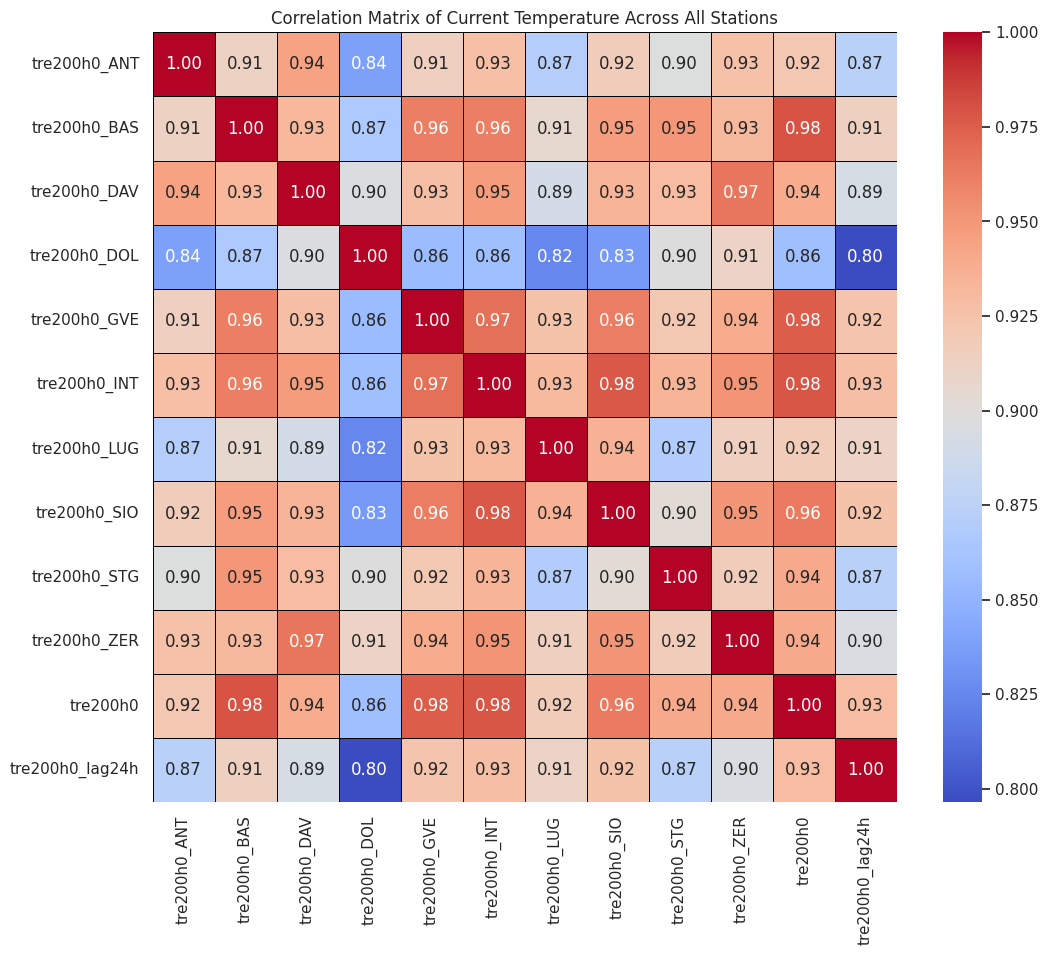

In [16]:
# figure out what temperature reading from which station is the most important for the target 

# Identify all current temperature columns (features)
temp_cols = [col for col in df.columns if col.startswith('tre200h0')]

# Calculate correlation matrix for temperature across all stations
temp_corr_matrix = df[temp_cols].corr()

# Visualize the temperature correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(temp_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of Current Temperature Across All Stations')
plt.show()
plt.savefig('spatial_temp_correlation.png')
plt.close()

**Conclusion:** The heatmap reveals that all current temperature readings from all stations are highly correlated with each other (mostly $r > 0.90$) , indicating the strong influence of a large-scale, unified macro-weather system across Switzerland. The temperature in the target's location (Bern) is most highly correlated with nearby/similar stations (Basel, Geneva, Interlaken), while stations at more distinct geographical locations or altitudes (Lugano, La Dôle, Andermatt) show slightly lower, though still high, correlations. This confirms that selecting a single representative station temperature, rather than including all 10, is sufficient to capture the bulk of the thermal information.

#### 3.6 Temporal Analysis (Daily Cycle)

This section visualizes the average daily cycle of temperature to understand how the future temperature targets (12h, 24h, 48h ahead) relate to the current temperature across the 24 hours of the day. This helps identify the complexity of each prediction horizon and potentially suggests the hour of the day as a powerful feature.

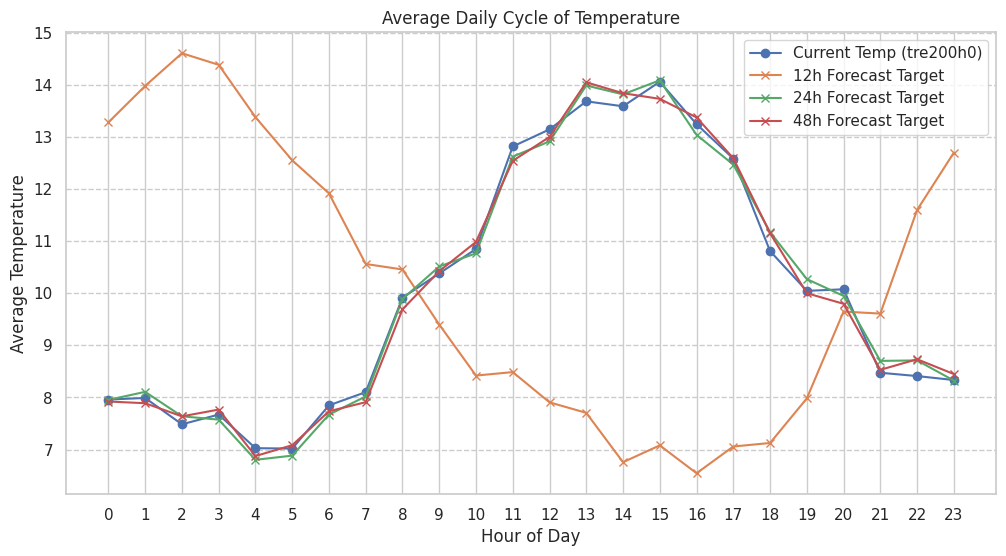

In [17]:
# Group by hour and calculate the mean for current and 12h target temperature
daily_cycle = df.groupby('hour')[['tre200h0', 'target_tre200h0_plus12h', 'target_tre200h0_plus24h', 'target_tre200h0_plus48h']].mean().reset_index()

# Plotting the daily cycle
plt.figure(figsize=(12, 6))
plt.plot(daily_cycle['hour'], daily_cycle['tre200h0'], label='Current Temp (tre200h0)', marker='o')
plt.plot(daily_cycle['hour'], daily_cycle['target_tre200h0_plus12h'], label='12h Forecast Target', marker='x')
plt.plot(daily_cycle['hour'], daily_cycle['target_tre200h0_plus24h'], label='24h Forecast Target', marker='x')
plt.plot(daily_cycle['hour'], daily_cycle['target_tre200h0_plus48h'], label='48h Forecast Target', marker='x')
plt.title('Average Daily Cycle of Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()
plt.savefig('daily_cycle.png')
plt.close()

**Observation:** The plot confirms that the 24h and 48h forecast targets are highly correlated with the current temperature curve, since the temperature trend at the same time on successive days is stable. Conversely, the 12h forecast target is strongly anti-correlated , as predicting noon temperature from midnight temperature (and vice versa) means jumping from the peak to the trough of the daily cycle, making the 12h task more challenging, despite temperature still being the best immediate predictor. This structural relationship confirms the hour column is a valuable feature that captures the cyclical nature of the temperature.

#### 3.7 Seasonal Analysis 

This section analyzes seasonal distribution to confirm the magnitude of the mean shift in temperature across seasons and quantify how the variability (standard deviation) changes. This crucial step determines if the `season` must be one-hot encoded and if seasonal-specific models are necessary.

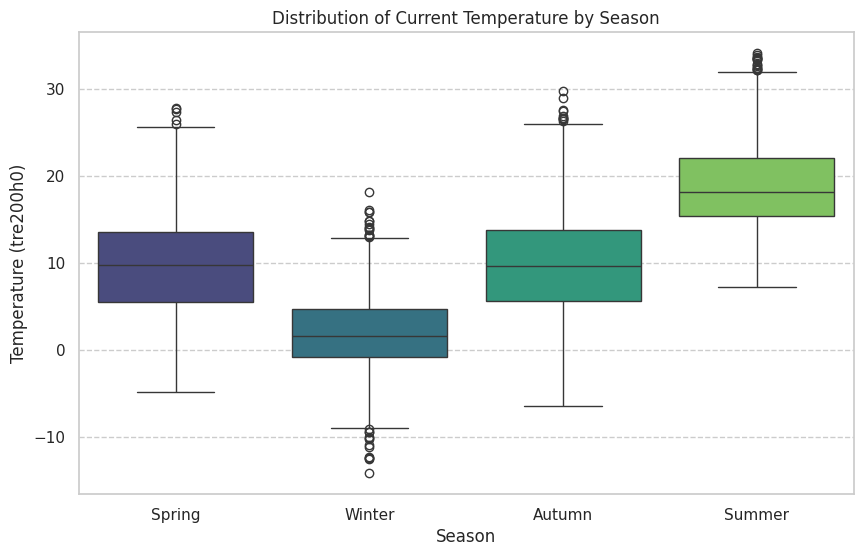


Quantitative Seasonal Analysis

         tre200h0           target_tre200h0_plus12h            \
             mean       std                    mean       std   
season                                                          
Autumn   9.937534  6.004364               10.001249  5.981338   
Spring   9.706527  5.802437                9.763455  5.954764   
Summer  18.929740  4.840788               19.235276  5.064974   
Winter   1.947733  4.284975                1.991031  4.301342   

       target_tre200h0_plus24h           target_tre200h0_plus48h            
                          mean       std                    mean       std  
season                                                                      
Autumn                9.772298  6.008110                9.588702  5.977939  
Spring                9.794079  5.824115               10.066980  5.915684  
Summer               18.966441  4.812363               18.838470  4.817355  
Winter                2.041704  4.336976         

In [18]:
# Purpose: Understand variability and central tendency of the temperature targets change across the sasons

# plot boxplots (current temperature per season)
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'season', y = 'tre200h0', data=df, palette='viridis', hue='season', legend=False)
plt.title('Distribution of Current Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (tre200h0)')
plt.grid(axis='y', linestyle='--')
plt.show()

# quantify boxplot for current and all target variabels
print("\n" + "="*75)
print("Quantitative Seasonal Analysis")
print("="*75 + "\n")
seasonal_stats = df.groupby('season')[['tre200h0', 'target_tre200h0_plus12h', 'target_tre200h0_plus24h', 'target_tre200h0_plus48h']].agg(['mean', 'std'])
print(seasonal_stats)

# Error Analysis: after initial model training, use seasonal groups to perform error analyisis, if error high in particular season --> feature engineering

**Observation:** The boxplot and quantitative stats show a mean temperature shift across seasons, confirming that the `season` feature is mandatory for modeling. The standard deviation (`std`) reveals that Autumn and Spring generally have higher variability than Summer or Winter. This suggests three key actions: one-hot encoding the `season` feature, conducting seasonal-specific feature selection (e.g., Solar Radiation matters more in Summer), and potentially considering seasonal-specific models to optimize performance where variability is highest. Post-training, error analysis must be segmented by season; if model error is consistently high in a particular season (like Autumn or Spring), this indicates the need for targeted feature engineering to close those specific performance gaps.

## 4 Data Cleaning

### 4.1 Handling Missing Values

This sections drops the missing values as a consequence of the low percentage they represent in the total data set, as concluded above.

In [19]:
# drop missing values
rows_before_drop = df.shape[0]
df_clean = df.copy().dropna()
rows_after_drop = df_clean.shape[0]
print(rows_before_drop)
print(rows_after_drop)

7579
7429


In [20]:
print(df_clean.shape)
df_clean.columns.tolist()

(7429, 92)


['fkl010h0_ANT',
 'fkl010h0_BAS',
 'fkl010h0_DAV',
 'fkl010h0_DOL',
 'fkl010h0_GVE',
 'fkl010h0_INT',
 'fkl010h0_LUG',
 'fkl010h0_SIO',
 'fkl010h0_STG',
 'fkl010h0_ZER',
 'fkl010h3_ANT',
 'fkl010h3_BAS',
 'fkl010h3_DAV',
 'fkl010h3_DOL',
 'fkl010h3_GVE',
 'fkl010h3_INT',
 'fkl010h3_LUG',
 'fkl010h3_SIO',
 'fkl010h3_STG',
 'fkl010h3_ZER',
 'gre000h0_ANT',
 'gre000h0_BAS',
 'gre000h0_DAV',
 'gre000h0_DOL',
 'gre000h0_GVE',
 'gre000h0_INT',
 'gre000h0_LUG',
 'gre000h0_SIO',
 'gre000h0_STG',
 'gre000h0_ZER',
 'pp0qffh0_BAS',
 'pp0qffh0_GVE',
 'pp0qffh0_INT',
 'pp0qffh0_LUG',
 'pp0qffh0_SIO',
 'prestah0_ANT',
 'prestah0_BAS',
 'prestah0_DAV',
 'prestah0_DOL',
 'prestah0_GVE',
 'prestah0_INT',
 'prestah0_LUG',
 'prestah0_SIO',
 'prestah0_STG',
 'prestah0_ZER',
 'rre150h0_ANT',
 'rre150h0_BAS',
 'rre150h0_DAV',
 'rre150h0_DOL',
 'rre150h0_GVE',
 'rre150h0_INT',
 'rre150h0_LUG',
 'rre150h0_SIO',
 'rre150h0_STG',
 'rre150h0_ZER',
 'sre000h0_ANT',
 'sre000h0_BAS',
 'sre000h0_DAV',
 'sre000h0_DOL

### 4.2 Handling Outliers

Outliers need to be handled for linear models, since these assume the data is normally distributed. The preprocessing step of handing outliers improves their performance and reliability. This is not required for decision tree models

#### 4.2.1 Solar/Global Radiation Outliers

The first part of the outliers to be handled are these in radiation and precipitation. For this purpose, log transformation and Box-Cox transformation are two viable options. These transformations handle outliers by compressing the spread of the data, particularly the large, extreme values on the high end of a positively skewed distribution. Outliers are pulled in, and the distribution will look more symmetrical and closer to a normal distribution. First, this project implements log transformations to normalize without losing the information about natural extremes. 

**Outlier Handling: Log transformation for Skewed Features for Radiation and Precipitation**

In [21]:
# commented out

In [22]:
# Outlier Handling: Log transformation for Skewed Features for Radiation and Precipitation

# Define the *prefixes* for the features that need a log transformation.
# The actual columns are formatted as 'PREFIX_STATION' (e.g., 'sre000h0_ANT').
radiation_precip_prefixes = ['sre000h0', 'gre000h0', 'rre150h0']

# Dynamically find all columns matching these prefixes across all stations
radiation_precip_cols_to_transform = [
    col for col in df_clean.columns
    if any(col.startswith(prefix) and not col.endswith('_log') for prefix in radiation_precip_prefixes)
    # Exclude any existing '_log' columns to prevent errors on re-running
]

# Apply the Log(1 + x) transformation (using np.log1p)
transformed_cols = []
original_cols_sample = [] # Use this list to hold the original columns found
    
for col in radiation_precip_cols_to_transform:
    new_col_name = col + '_log'
    df_clean[new_col_name] = np.log1p(df_clean[col]) # np.log1p calculates ln(x + 1), necessary as ln(x) is undefined for x = 0 (the variables 'sre000h0', 'gre000h0', 'rre150h0' in clude 0)
    transformed_cols.append(new_col_name)
    original_cols_sample.append(col) # Store the original column name

In [23]:
print(df_clean.shape)
df_clean.columns.tolist()

(7429, 122)


['fkl010h0_ANT',
 'fkl010h0_BAS',
 'fkl010h0_DAV',
 'fkl010h0_DOL',
 'fkl010h0_GVE',
 'fkl010h0_INT',
 'fkl010h0_LUG',
 'fkl010h0_SIO',
 'fkl010h0_STG',
 'fkl010h0_ZER',
 'fkl010h3_ANT',
 'fkl010h3_BAS',
 'fkl010h3_DAV',
 'fkl010h3_DOL',
 'fkl010h3_GVE',
 'fkl010h3_INT',
 'fkl010h3_LUG',
 'fkl010h3_SIO',
 'fkl010h3_STG',
 'fkl010h3_ZER',
 'gre000h0_ANT',
 'gre000h0_BAS',
 'gre000h0_DAV',
 'gre000h0_DOL',
 'gre000h0_GVE',
 'gre000h0_INT',
 'gre000h0_LUG',
 'gre000h0_SIO',
 'gre000h0_STG',
 'gre000h0_ZER',
 'pp0qffh0_BAS',
 'pp0qffh0_GVE',
 'pp0qffh0_INT',
 'pp0qffh0_LUG',
 'pp0qffh0_SIO',
 'prestah0_ANT',
 'prestah0_BAS',
 'prestah0_DAV',
 'prestah0_DOL',
 'prestah0_GVE',
 'prestah0_INT',
 'prestah0_LUG',
 'prestah0_SIO',
 'prestah0_STG',
 'prestah0_ZER',
 'rre150h0_ANT',
 'rre150h0_BAS',
 'rre150h0_DAV',
 'rre150h0_DOL',
 'rre150h0_GVE',
 'rre150h0_INT',
 'rre150h0_LUG',
 'rre150h0_SIO',
 'rre150h0_STG',
 'rre150h0_ZER',
 'sre000h0_ANT',
 'sre000h0_BAS',
 'sre000h0_DAV',
 'sre000h0_DOL

To verify whether the log transformation was successful, the distribution of the data needs to be analyzed. This can be done visually with histograms and Q-Q plots. This section analyzes the skew with the `proplot` (generates Q-Q plots) and `skew` functions from the `scipy.stats` library

Original Skewness: 1.6569
Transformed Skewness: 1.2965


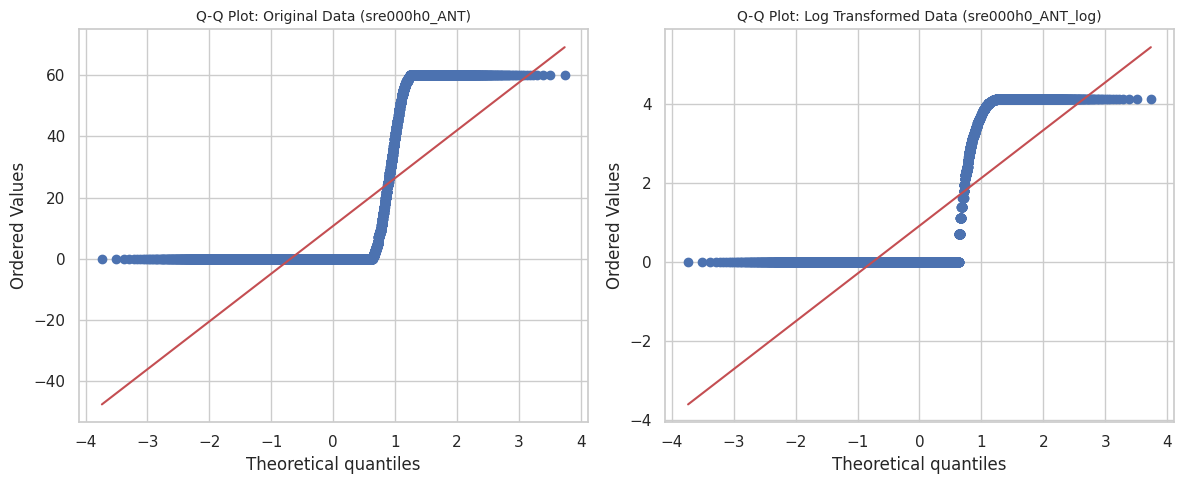

In [24]:
# import to check skewness and probplot
from scipy.stats import probplot, skew

col_original = 'sre000h0_ANT'
col_transformed = 'sre000h0_ANT_log'

# 1. Calculate Skewness on one representative column
original_skew = skew(df_clean[col_original])
transformed_skew = skew(df_clean[col_transformed])

print(f"Original Skewness: {original_skew:.4f}")
print(f"Transformed Skewness: {transformed_skew:.4f}")

# 2. Create Q-Q plots for the representative column
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q Plot for Original Data
probplot(df_clean[col_original], dist="norm", plot=axes[0])
axes[0].set_title(f'Q-Q Plot: Original Data ({col_original})', fontsize=10)

# Q-Q Plot for Log-Transformed Data
probplot(df_clean[col_transformed], dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q Plot: Log Transformed Data ({col_transformed})', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('qq_plot_original_vs_log.png')
plt.show()

# Observation: the original skewness was at 1.7 and the new is at 1.3 --> $\log(1+x)$ transformation was not strong enough
# --> we need a stronger transformation (square root transformation is weaker) --> Box-Cox transformation
# Box-Cox transformation:  the most flexible and often the best choice because it finds the optimal power to transform the data.
# formula of box-cox transformation: $y(\lambda) = \frac{x^\lambda - 1}{\lambda}$ for $\lambda \neq 0$$y(\lambda) = \log(x)$ for $\lambda = 0$
# Box-Cox transformation requires positive data, our data has values at 0 --> we need to apply Box-Cox with a shift


In [25]:
# Check how many columns exist now
print(df_clean.shape)
df_clean.columns.tolist()
prefix = 'gre000h0_'
count = sum(1 for file_name in df_clean.columns.tolist() if file_name.startswith(prefix))
count


(7429, 122)


20

For the example variable chosen, the skewness was only marginally reduced, dropping from $1.6569$ to $1.2965$. Visually, the Q-Q plot for the log-transformed data still shows a significant deviation from the normal reference line, particularly where the bulk of the non-zero data lies (around a theoretical quantile of 1). This residual curvature indicates the distribution is still highly non-normal, necessitating a stronger technique like the Box-Cox transformation to find an optimal power ($\lambda$) for normalization. The following code cell will not only implement the Box-Cox transformation but also compare its results with the ones from the log transformation.

In [26]:
# PREP STEP: Gather Log Transformation Skewness for Comparison
from scipy.stats import skew
import numpy as np

# Dictionary to store skewness results from the previous log transformation
log_skewness_results = {}
radiation_precip_prefixes = ['sre000h0', 'gre000h0', 'rre150h0']

# Dynamically find all original columns to get their log-transformed skewness
cols_for_comparison = [
    col for col in df_clean.columns
    if any(col.startswith(prefix) and not col.endswith('_log') and not col.endswith('_boxcox') for prefix in radiation_precip_prefixes)
]

for col in cols_for_comparison:
    log_col = col + '_log'
    # Only store if the log-transformed column exists
    if log_col in df_clean.columns:
        log_skewness_results[col] = {
            'original_skew': skew(df_clean[col]),
            'log_transformed_skew': skew(df_clean[log_col])
        }


# BOX-COX TRANSFORMATION 
# import required Box-Cox function
from scipy.stats import boxcox

# Define the *prefixes* for the features that need the Box-Cox transformation.
# (This list is the same as the one used for the PREP STEP above)
radiation_precip_prefixes = ['sre000h0', 'gre000h0', 'rre150h0']

# Dynamically find all columns matching these prefixes across all stations
radiation_precip_cols_to_transform = [
    col for col in df_clean.columns
    # Check for prefix and ensure we don't transform a column that is ALREADY Box-Cox transformed
    if any(col.startswith(prefix) and not col.endswith('_boxcox') and not col.endswith('_log') for prefix in radiation_precip_prefixes)
]

# Small shift constant to handle zero values, as Box-Cox requires y > 0
shift_constant = 1e-6 

print("--- Box-Cox Transformation Results ---")

for col in radiation_precip_cols_to_transform:
    # 1. Apply the shift to handle zeros
    data_shifted = df_clean[col] + shift_constant
    
    # 2. Apply Box-Cox transformation
    transformed_data, lmbda = boxcox(data_shifted)
    
    # 3. Create the new column name
    new_col_name = col + '_boxcox'
    
    # 4. Store the transformed data in the DataFrame
    df_clean[new_col_name] = transformed_data
    
    # 5. Calculate skewness for comparison
    original_skew = skew(df_clean[col])
    boxcox_transformed_skew = skew(df_clean[new_col_name])
    
    # 6. Retrieve Log Skewness results
    log_results = log_skewness_results.get(col, {'original_skew': np.nan, 'log_transformed_skew': np.nan})

    # 7. Print COMPARATIVE results in a well-structured format
    print("=" * 60)
    print(f"Feature: {col}")
    print("-" * 30)
    
    # Log Transformation Results
    print("Log Transformation (np.log1p):")
    print(f"  Original Skewness: {log_results['original_skew']:.4f}")
    print(f"  New Skewness (Log): {log_results['log_transformed_skew']:.4f}")
    
    # Box-Cox Transformation Results
    print("\nBox-Cox Transformation:")
    print(f"  Optimal Lambda (λ): {lmbda:.4f}")
    print(f"  New Skewness (Box-Cox): {boxcox_transformed_skew:.4f}")
    
print("=" * 60)

--- Box-Cox Transformation Results ---
Feature: gre000h0_ANT
------------------------------
Log Transformation (np.log1p):
  Original Skewness: 1.7139
  New Skewness (Log): 0.3014

Box-Cox Transformation:
  Optimal Lambda (λ): 0.0066
  New Skewness (Box-Cox): -0.0405
Feature: gre000h0_BAS
------------------------------
Log Transformation (np.log1p):
  Original Skewness: 1.7238
  New Skewness (Log): 0.2800

Box-Cox Transformation:
  Optimal Lambda (λ): 0.0130
  New Skewness (Box-Cox): -0.0787
Feature: gre000h0_DAV
------------------------------
Log Transformation (np.log1p):
  Original Skewness: 1.6394
  New Skewness (Log): 0.2806

Box-Cox Transformation:
  Optimal Lambda (λ): 0.0090
  New Skewness (Box-Cox): -0.0550
Feature: gre000h0_DOL
------------------------------
Log Transformation (np.log1p):
  Original Skewness: 1.6878
  New Skewness (Log): 0.2333

Box-Cox Transformation:
  Optimal Lambda (λ): 0.0143
  New Skewness (Box-Cox): -0.0870
Feature: gre000h0_GVE
-----------------------

In [27]:
# Check how many columns exist now
print(df_clean.shape)
df_clean.columns.tolist()
prefix = 'gre000h0_'
count = sum(1 for file_name in df_clean.columns.tolist() if file_name.startswith(prefix))
count

(7429, 152)


30

The Box-Cox transformation successfully achieved near-zero skewness for all features related to `gre000h0` (e.g., `gre000h0_ANT` original skew: $1.71$, transformed skew: $-0.04$), confirming its effectiveness in normalizing these variables. However, the features related to `sre000h0` and `rre150h0` still exhibit significant residual skewness (transformed values around $1.0$ to $3.13$). While the Box-Cox method is the most robust general power transformation, for the remaining highly-skewed features, further transformations or reliance on machine learning models that are less sensitive to non-normality (like tree-based models) will be necessary to handle the residual outliers.

In [28]:
# An Alternative Approach: Try non-exponential transformations to reduce skewness, like the quantile transformation that maps the data to a normal distribution.

#### 4.2.1 Wind Gust/Speed Outliers

As seen in the violin plots during the EDA step, wind speed and gust features, deonted by the `fkl*` columns, contain high-magnitude outliers. For non-tree-based models, these rare, high peaks can overly influence the calculated coefficients, leading to a less robust and generalizeable model fit. As a consequence, this section uses Winsorization, or capping which limits the maximum value fo these featres to the 99th percentile threshold in order to reduce the influence of the most extreme 1% observations.

In [29]:
# High peaks (gusts) that overly influence linear coefficients.
# Action (For Non-Tree Models): Apply Capping (Winsorization) at the 99th percentile.
# mitigate influence of extreme wind gusts on linear models

# Identify all wind speed/gust columns (fkl*)
fkl_cols = [col for col in df_clean.columns if col.startswith('fkl')]

print("\nBefore Capping (Max Values)")

# Calculate and store original max values for comparison
original_max_values = df_clean[fkl_cols].max()
print(original_max_values.to_string())

# Apply Capping (Winsorization) at the 99th percentile
for col in fkl_cols:
    # Calculate the 99th percentile (the cap value)
    cap_value = df_clean[col].quantile(0.99)
    
    # Apply the capping: replace values > cap_value with cap_value
    # clip() is an efficient way to apply capping
    df_clean[col] = df_clean[col].clip(upper=cap_value)

print("\nAfter Capping (Max Values)")
# Calculate and print new max values for comparison
new_max_values = df_clean[fkl_cols].max()
print(new_max_values.to_string())

# Select a sample column to show the change clearly
sample_col = fkl_cols[0] if fkl_cols else "None"

print(f"\nExample change for '{sample_col}':")
print(f"Original Max: {original_max_values[sample_col]:.2f}")
print(f"New Max (99th Percentile): {new_max_values[sample_col]:.2f}")

# observation: Values are capped


Before Capping (Max Values)
fkl010h0_ANT    16.8
fkl010h0_BAS    11.1
fkl010h0_DAV    11.0
fkl010h0_DOL    28.4
fkl010h0_GVE    13.6
fkl010h0_INT    10.4
fkl010h0_LUG    14.3
fkl010h0_SIO    14.2
fkl010h0_STG    12.1
fkl010h0_ZER    13.4
fkl010h3_ANT    24.3
fkl010h3_BAS    23.4
fkl010h3_DAV    21.9
fkl010h3_DOL    39.9
fkl010h3_GVE    25.5
fkl010h3_INT    19.4
fkl010h3_LUG    26.1
fkl010h3_SIO    21.4
fkl010h3_STG    28.3
fkl010h3_ZER    24.9

After Capping (Max Values)
fkl010h0_ANT    10.400
fkl010h0_BAS     6.600
fkl010h0_DAV     7.000
fkl010h0_DOL    19.872
fkl010h0_GVE     8.700
fkl010h0_INT     5.700
fkl010h0_LUG     7.800
fkl010h0_SIO     9.000
fkl010h0_STG     7.500
fkl010h0_ZER     7.300
fkl010h3_ANT    17.500
fkl010h3_BAS    15.072
fkl010h3_DAV    13.100
fkl010h3_DOL    27.600
fkl010h3_GVE    14.800
fkl010h3_INT    12.872
fkl010h3_LUG    16.672
fkl010h3_SIO    14.572
fkl010h3_STG    16.972
fkl010h3_ZER    14.372

Example change for 'fkl010h0_ANT':
Original Max: 16.80
New Max

In [30]:
# Check how many columns exist now
print(df_clean.shape)

(7429, 152)


It can be seen that, by comparing "Before Capping" and "After Capping" maximum values, the maximum values were either slightly or significantly reduced. This successful application for Winsorization ensures that all wind speed/gust observations are now constrained within their reasonable non-outlier range.

## 5. Feature Engineering and Preprocessing

### 5.2 Feature Encoding for `hour`

There are two more variables that need to be coded correctly in order to be useful for the model. One of these is the `hour`. Currently, the `hour` column contains values from 0 to 23. The model would treat the values 0 and 23 as being far apart, even though they are adjacent. Therefore, a sine and cosine transformation is necessary to capture this relationship.

In [31]:
# Cyclical Encoding for 'hour'

# The cycle length is 24 hours (0 to 23)
max_hour = 24

# Calculate the sine and cosine components for the 'hour' feature
df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / max_hour)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / max_hour)

# drop the original hour column
df_clean = df_clean.drop(columns = ['hour'])

# display verification metrics
# Show the first few rows of the new features along with the unscaled 'season'
print(df_clean[['hour_sin', 'hour_cos', 'season']].head().to_string())

   hour_sin  hour_cos  season
0  0.965926  0.258819  Spring
1  0.707107  0.707107  Spring
2  0.000000  1.000000  Winter
3 -0.258819 -0.965926  Autumn
4  0.258819 -0.965926  Summer


In [32]:
# Check how many columns exist now (added 2-1 columns)
df_clean.shape

(7429, 153)

### 5.3 One-Hot Encoding for `season`

The categorical variable `season` needs to be transformed in order to be able to be handled by the model. The process of one-hot encoding will convert the single categorical column `season` into N-1 new binary (0 or 1) columns, where N is the number of unique seasons. N-1 columns are used for the categorical values to avoid multicollinearity in linear models.

In [33]:
# one hot encoding for season
# prefix to name new columns correctly
# drop_first=True to prevent multicollinearity
df_clean = pd.get_dummies(df_clean, columns = ['season'], prefix = 'season', drop_first = True)
season_cols = [col for col in df_clean.columns if col.startswith('season_')]
df_clean[season_cols] = df_clean[season_cols].astype(int)

# Verificatioin
print(df_clean[season_cols + ['target_tre200h0_plus12h']].head())
# observation: One-Hot Encoding successfual for season column 

   season_Spring  season_Summer  season_Winter  target_tre200h0_plus12h
0              1              0              0                     17.5
1              1              0              0                     12.1
2              0              0              1                     -7.1
3              0              0              0                      3.2
4              0              1              0                     15.7


In [34]:
# added 3-1 columns
df_clean.shape

(7429, 155)

### 5.4 Feature Selection to avoid Multicollinearity

#### 5.4.1 Multicollinearity in Temperature Readings

At present, there are 12 different temperature reading features in the dataset. All of these are closely correlated which introduces multicollinearity. In order to avoid this, eight of the temperatue reading variables are dropped and only three are kept. 

tre200h0 is the first to be kept. This is the current temperature variable and it is closest related to the 24h target (0.720715) and highly correlated with the 48h target with a value of 0.882747.

tre200h0_STG is the second variable kept because it's the closest related to the 12h target (0.792016). It captures short-term temperature changes and distinct regional weather dynamics.

tre200h0\_SIO is the strongest correlated with the long term forecast of 48h. 

Additionally tre200h0_lag24h is kept as it captures the temporal persistance


In [35]:
# drop temperature reading columns to avoid multicollinearity
## df_clean = df_clean.drop(['tre200h0_ANT', 'tre200h0_BAS', 'tre200h0_DAV', 'tre200h0_DOL', 'tre200h0_GVE', 'tre200h0_INT', 'tre200h0_LUG', 'tre200h0_ZER'], axis = 1)
# Alternative Approach: Drop all temperature reading variables and only keep the mean, median, and std deviation

#### 5.4.2 Spacial Multicollinearity  

The following code creates new spatial aggregate features by calculating the mean, median, and standard deviation across all 10 stations for each defined variable in the dataset to reduce high multicollinearity among the individual station-specific variables and capture the overall spatial trend.

In [36]:
# Define the prefixes for variables available across all 10 stations
# These are the variables that end with one of the 10 station suffixes
variable_prefixes = [
    'fkl010h0', 'fkl010h3', 'gre000h0', 'prestah0', 'rre150h0',
    'sre000h0', 'tre200h0', 'ure200h0'
]

# List of aggregation functions to apply
agg_functions = ['mean', 'median', 'std']

# Perform aggregation
for prefix in variable_prefixes:
    # Find all columns belonging to the current variable prefix
    # Use regex to find columns starting with the prefix and followed by an underscore
    cols = [col for col in df_clean.columns if col.startswith(f'{prefix}_')]
    for func in agg_functions:
        new_col_name = f'{prefix}_{func}'
        # Apply the aggregation function row-wise (axis=1)
        if func == 'mean':
            df_clean[new_col_name] = df_clean[cols].mean(axis=1)
        elif func == 'median':
            df_clean[new_col_name] = df_clean[cols].median(axis=1)
        elif func == 'std':
            df_clean[new_col_name] = df_clean[cols].std(axis=1)

# Drop columns after taking statistics of them
## df_clean = df_clean.drop(columns=list(set(columns_to_drop)))

In [37]:
# added 24 columns
print(df_clean.shape)

(7429, 179)


As for the original features, the Box-Cox transformation still needs to be applied to the derived aggregate features. The code-cell below implements exactly this.

In [38]:
# already imported
## from scipy.stats import boxcox
## import numpy as np

# 1. Define all columns to be transformed 
# Define all prefixes and aggregation functions used to create the new columns
variable_prefixes = [
    'fkl010h0', 'fkl010h3', 'gre000h0', 'prestah0', 'rre150h0',
    'sre000h0', 'tre200h0', 'ure200h0'
]
agg_suffixes = ['mean', 'median', 'std']

# Dynamically find all 8 * 3 = 24 aggregate columns
aggregate_cols_to_transform = []
for prefix in variable_prefixes:
    for suffix in agg_suffixes:
        col_name = f'{prefix}_{suffix}'
        # Ensure the column exists and hasn't ALREADY been transformed
        if col_name in df_clean.columns and not col_name.endswith('_boxcox'):
            aggregate_cols_to_transform.append(col_name)

# 2. Pre-check and Fix for Negative Values (Essential for Box-Cox)
# Small shift constant to handle zero values
shift_constant = 1e-6
fixed_count = 0

print("--- Pre-check: Clipping Negative Aggregate Values ---")
for col in aggregate_cols_to_transform:
    min_val = df_clean[col].min()
    if min_val < 0:
        # Clip negative values to zero to prevent Box-Cox ValueError
        df_clean[col] = df_clean[col].clip(lower=0)
        print(f"  Clipped negative values in '{col}'. Min changed from {min_val:.10f} to 0.0000000000.")
        fixed_count += 1
        
print(f"Finished pre-check. {fixed_count} columns were clipped.")


# 3. Apply Box-Cox Transformation
print("\n--- Box-Cox Transformation Results for ALL Aggregate Features ---")

transformed_count = 0
for col in aggregate_cols_to_transform:
    # 1. Apply the shift to handle zeros
    data_shifted = df_clean[col] + shift_constant

    # 2. Apply Box-Cox transformation
    try:
        # Box-Cox requires data > 0, which is ensured by the pre-check and shift_constant.
        transformed_data, lmbda = boxcox(data_shifted)
    except Exception as e:
        # Catch unexpected errors (e.g., if the data is constant)
        print(f"ERROR: Box-Cox failed for column '{col}'. Skipping transformation. Reason: {e}")
        continue

    # 3. Create the new column name
    new_col_name = col + '_boxcox'

    # 4. Store the transformed data in the DataFrame
    df_clean[new_col_name] = transformed_data
    transformed_count += 1
    # print(f"Transformed column: {col} -> {new_col_name} (Lambda: {lmbda:.4f})")

print(f"\nSuccessfully transformed {transformed_count} aggregate columns out of {len(aggregate_cols_to_transform)}.")

--- Pre-check: Clipping Negative Aggregate Values ---
  Clipped negative values in 'gre000h0_mean'. Min changed from -4.2238616547 to 0.0000000000.
  Clipped negative values in 'rre150h0_mean'. Min changed from -34782.4253547026 to 0.0000000000.
  Clipped negative values in 'sre000h0_mean'. Min changed from -16.8953872401 to 0.0000000000.
  Clipped negative values in 'tre200h0_mean'. Min changed from -13.6545454545 to 0.0000000000.
  Clipped negative values in 'tre200h0_median'. Min changed from -11.4000000000 to 0.0000000000.
Finished pre-check. 5 columns were clipped.

--- Box-Cox Transformation Results for ALL Aggregate Features ---


/home/ephraim/anaconda3/envs/biz_analytics/lib/python3.11/site-packages/scipy/stats/_morestats.py:1186: UserWarning: The optimal lambda is -61.59988279540607, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)



Successfully transformed 24 aggregate columns out of 24.


In [39]:
# added 24 columns
print(df_clean.shape)


(7429, 203)


### 5.5 Feature Engineering 

In [40]:
# Further Optimization Potential

### 5.1 Standardization

The following code uses the StandardScaler from `sklearn` to standardize the remaining numerical feature columns in the DataFrame (centering them at a mean of 0 and scaling them to a standard deviation of 1), while explicitly excluding the target variables and engineered categorical/cyclic features.

In [49]:
df_clean = df_clean.drop(['rre150h0_mean_boxcox'], axis=1).copy() # 'rre150h0_mean_boxcox' will not be kept because it includes NaNs after scaling (consequence of box-cox transformation creating a standard deviation of 0), which makes skaling impossible
df_clean.shape

(7429, 202)

In [50]:
from sklearn.preprocessing import StandardScaler
# 1. Define Columns to Exclude
# We exclude the target variables, the categorical feature 'season', and the cyclical 'hour'
cols_to_exclude = [
    'target_tre200h0_plus12h', 
    'target_tre200h0_plus24h', 
    'target_tre200h0_plus48h',
    'hour_sin',
    'hour_cos',
    'season_Spring',
    'season_Summer', 
]

# 2. Select Numerical Features to Scale
# Get all columns that are not in the exclusion list
cols_to_scale = df_clean.drop(columns=cols_to_exclude).columns.tolist()

# Final check for numerical columns to ensure no categorical data is scaled
numeric_cols_to_scale = df_clean[cols_to_scale].select_dtypes(include=np.number).columns.tolist()

# 3. Apply Standard Scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_clean[numeric_cols_to_scale] = scaler.fit_transform(df_clean[numeric_cols_to_scale])

# Check mean and std for a sample of scaled columns
sample_cols = numeric_cols_to_scale[:3] + [col for col in numeric_cols_to_scale if col.startswith('fkl')][:3]

print(f"Total features selected for scaling: {len(numeric_cols_to_scale)}")
print(f"Checking Mean and Std for sample scaled columns:")

verification_df = df_clean[sample_cols].agg(['mean', 'std']).T
verification_df['mean'] = verification_df['mean'].round(4)
verification_df['std'] = verification_df['std'].round(4)
print(verification_df.to_string())

Total features selected for scaling: 195
Checking Mean and Std for sample scaled columns:
              mean     std
fkl010h0_ANT   0.0  1.0001
fkl010h0_BAS  -0.0  1.0001
fkl010h0_DAV   0.0  1.0001
fkl010h0_ANT   0.0  1.0001
fkl010h0_BAS  -0.0  1.0001
fkl010h0_DAV   0.0  1.0001


The following code performs feature selection of the scaled variables by removing all redundant columns, such as the individual station measurements and the raw, unscaled aggregate features in order to keep only the target variables, engineered time features, and the finalized Box-Cox aggregate features for streamlined model training.

In [51]:
# 1. Define the columns to KEEP 
# This list contains the targets, time/seasonal features, and the final Box-Cox aggregates.
columns_to_keep = [
    # Target Variables
    'target_tre200h0_plus12h',
    'target_tre200h0_plus24h',
    'target_tre200h0_plus48h',
    
    # Time/Seasonal Features
    'hour_sin',
    'hour_cos',
    'season_Spring',
    'season_Summer',
    'season_Winter',
    
    # Final Box-Cox Aggregate Features (Mean, Median, Std for 7 prefixes)
    'fkl010h0_mean_boxcox', 'fkl010h0_median_boxcox', 'fkl010h0_std_boxcox',
    'fkl010h3_mean_boxcox', 'fkl010h3_median_boxcox', 'fkl010h3_std_boxcox',
    'gre000h0_mean_boxcox', 'gre000h0_median_boxcox', 'gre000h0_std_boxcox',
    'prestah0_mean_boxcox', 'prestah0_median_boxcox', 'prestah0_std_boxcox',
    'rre150h0_median_boxcox', 'rre150h0_std_boxcox', # 'rre150h0_mean_boxcox' already removed above 
    'tre200h0_mean_boxcox', 'tre200h0_median_boxcox', 'tre200h0_std_boxcox',
    
    # NOTE: You excluded the 'ure200h0' prefix Box-Cox aggregates, so they are not included here.
]

# 2. Identify columns to DROP 
# Find all columns in df_clean that are NOT in the columns_to_keep list.
columns_to_drop = [col for col in df_clean.columns if col not in columns_to_keep]

# 3. Perform the drop operation
print(f"Total columns before drop: {df_clean.shape[1]}")
print(f"Dropping {len(columns_to_drop)} columns...")

df_selected_features = df_clean.drop(columns=columns_to_drop, inplace=False)
df_all_features = df_clean.copy()

# 4. Verification
print(f"Total columns remaining in df_selected_features: {df_selected_features.shape[1]}")
print(f"Total columns remaining in df_all_features: {df_all_features.shape[1]}")
print("\nFinal remaining columns in df_selected_features:")
print(df_selected_features.columns.tolist())

Total columns before drop: 202
Dropping 174 columns...
Total columns remaining in df_selected_features: 28
Total columns remaining in df_all_features: 202

Final remaining columns in df_selected_features:
['target_tre200h0_plus12h', 'target_tre200h0_plus24h', 'target_tre200h0_plus48h', 'hour_sin', 'hour_cos', 'season_Spring', 'season_Summer', 'season_Winter', 'fkl010h0_mean_boxcox', 'fkl010h0_median_boxcox', 'fkl010h0_std_boxcox', 'fkl010h3_mean_boxcox', 'fkl010h3_median_boxcox', 'fkl010h3_std_boxcox', 'gre000h0_mean_boxcox', 'gre000h0_median_boxcox', 'gre000h0_std_boxcox', 'prestah0_mean_boxcox', 'prestah0_median_boxcox', 'prestah0_std_boxcox', 'rre150h0_median_boxcox', 'rre150h0_std_boxcox', 'sre000h0_mean_boxcox', 'sre000h0_median_boxcox', 'sre000h0_std_boxcox', 'tre200h0_mean_boxcox', 'tre200h0_median_boxcox', 'tre200h0_std_boxcox']


## 6. Prepare Data for Machine Learning Algorythms 

The following section prepares the processed data for machine learning by defining the feature matrix ($\mathbf{X}$) and the three target vectors ($\mathbf{y}_{12}$, $\mathbf{y}_{24}$, $\mathbf{y}_{48}$), and then performing the essential training and testing data split to enable model development and evaluation.

In [52]:
df_selected_features.shape

(7429, 202)

In [53]:
# split data into predictor and prediction variables (here into the three different horizons 12, 24, 48)
X = df_selected_features.drop(['target_tre200h0_plus12h', 'target_tre200h0_plus24h', 'target_tre200h0_plus48h'], axis = 1)
y12 = df_selected_features[['target_tre200h0_plus12h']]
y24 = df_selected_features[['target_tre200h0_plus24h']]
y48 = df_selected_features[['target_tre200h0_plus48h']]

In [54]:
# set random seed
import random
from sklearn.model_selection import train_test_split
random.seed(42)
# split data into training and test data (y into the three different horizons)
X_train, X_test, y12_train, y12_test = train_test_split(X, y12, test_size = 0.2, random_state = 42)
X_train, X_test, y24_train, y24_test = train_test_split(X, y24, test_size = 0.2, random_state = 42)
X_train, X_test, y48_train, y48_test = train_test_split(X, y48, test_size = 0.2, random_state = 42)

## 7 Fit Simple Models

The following section prepares the final feature and target arrays, then initiates the training and evaluation of two distinct machine learning models, K-Nearest Neighbors (KNN) and Linear Regression, across all three specified prediction horizons ($\text{+12h}$, $\text{+24h}$, and $\text{+48h}$).

### 7.1 Fit K-Nearest Neighbors (KNN)

In [56]:
# try knn model for y12
from sklearn.neighbors import KNeighborsRegressor
knn12 = KNeighborsRegressor(n_neighbors = 8)
knn12.fit(X_train, y12_train)


,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
# try knn model for y24
from sklearn.neighbors import KNeighborsRegressor
knn24 = KNeighborsRegressor(n_neighbors = 5)
knn24.fit(X_train, y24_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [58]:
# try knn model for y48
from sklearn.neighbors import KNeighborsRegressor
knn48 = KNeighborsRegressor(n_neighbors = 5)
knn48.fit(X_train, y48_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 7.1 Fit Linear Regression

In [59]:
# try linear regression model for y12
from sklearn.linear_model import LinearRegression
lin_reg12 = LinearRegression()
lin_reg12.fit(X_train, y12_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
# try linear regression model for y24
from sklearn.linear_model import LinearRegression
lin_reg24 = LinearRegression()
lin_reg24.fit(X_train, y24_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
# try linear regression model for y48
from sklearn.linear_model import LinearRegression
lin_reg48 = LinearRegression()
lin_reg48.fit(X_train, y48_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 8 Make Predictions and evaluate Models

The following code section prepares the final feature and target arrays, then initiates the training and evaluation of two distinct machine learning models, K-Nearest Neighbors (KNN) and Linear Regression, across all three specified prediction horizons ($\text{+12h}$, $\text{+24h}$, and $\text{+48h}$). The models' performance will be evaluated using the Mean Absolute Error (MAE).

### 8.1 12h prediction

In [62]:
# make train predictions with simple models and evaluate
from sklearn.metrics import mean_absolute_error
knn12_preds_train = knn12.predict(X_train)
lin_reg12_preds_train = lin_reg12.predict(X_train)
print(f"MAE for KNN 12h train prediction: {mean_absolute_error(knn12_preds_train, y12_train)}")
print(f"MAE for Lin Reg 12h train prediction: {mean_absolute_error(lin_reg12_preds_train, y12_train)}")

MAE for KNN 12h train prediction: 2.275906528689214
MAE for Lin Reg 12h train prediction: 1.8941004661668333


In [63]:
# make test predictions with simple models and evaluate
knn12_preds = knn12.predict(X_test)
lin_reg12_preds = lin_reg12.predict(X_test)
from sklearn.metrics import mean_absolute_error
print(f"MAE for KNN 12h test prediction: {mean_absolute_error(knn12_preds, y12_test)}")
print(f"MAE for Lin Reg test 12h prediction: {mean_absolute_error(lin_reg12_preds, y12_test)}")

MAE for KNN 12h test prediction: 2.54289199192463
MAE for Lin Reg test 12h prediction: 1.9753616915004815


### 8.1 24h prediction

In [64]:
# make train predictions with simple models and evaluate
knn24_preds_train = knn24.predict(X_train)
lin_reg24_preds_train = lin_reg24.predict(X_train)
print(f"MAE for KNN 24h train prediction: {mean_absolute_error(knn24_preds_train, y24_train)}")
print(f"MAE for Lin Reg 24h train prediction: {mean_absolute_error(lin_reg24_preds_train, y24_train)}")

MAE for KNN 24h train prediction: 1.9134847720006731
MAE for Lin Reg 24h train prediction: 1.8907541139252118


In [65]:
# make test predictions with simple models and evaluate
knn24_preds = knn24.predict(X_test)
lin_reg24_preds = lin_reg24.predict(X_test)
from sklearn.metrics import mean_absolute_error
print(f"MAE for KNN 24h test prediction: {mean_absolute_error(knn24_preds, y24_test)}")
print(f"MAE for Lin Reg test 24h prediction: {mean_absolute_error(lin_reg24_preds, y24_test)}")

MAE for KNN 24h test prediction: 2.327738896366083
MAE for Lin Reg test 24h prediction: 1.9060503056755083


### 8.1 48h prediction

In [66]:
# make train predictions with simple models and evaluate
knn48_preds_train = knn48.predict(X_train)
lin_reg48_preds_train = lin_reg48.predict(X_train)
print(f"MAE for KNN 48h train prediction: {mean_absolute_error(knn48_preds_train, y48_train)}")
print(f"MAE for Lin Reg 48h train prediction: {mean_absolute_error(lin_reg48_preds_train, y48_train)}")

MAE for KNN 48h train prediction: 2.348376240955746
MAE for Lin Reg 48h train prediction: 2.4763808147773836


In [67]:
# make test predictions with simple models and evaluate
knn48_preds = knn48.predict(X_test)
lin_reg48_preds = lin_reg48.predict(X_test)
print(f"MAE for KNN 48h test prediction: {mean_absolute_error(knn48_preds, y48_test)}")
print(f"MAE for Lin Reg test 48h prediction: {mean_absolute_error(lin_reg48_preds, y48_test)}")

MAE for KNN 48h test prediction: 2.821399730820996
MAE for Lin Reg test 48h prediction: 2.5417311403501355


## 9. Next Steps: Improving Prediction Accuracy

The Mean Absolute Error (MAE) from the simple KNN and Linear Regression models is high, it indicates that these models are insufficient to capture the complexity of the weather prediction task. To improve performance, future work should focus on three main areas: 

1) Advanced Modeling Techniques, switching to non-linear methods like **Random Forest** and **Gradient Boosting (XGBoost/LightGBM)** to better capture feature interactions, and considering **LSTMs**.

2) Feature and Data Strategy, which involves experimenting with **interaction terms** to create interaction features and utilizing **Principal Component Analysis (PCA)** to simplify the high number of correlated features.

3) Model Rigor, where systematic optimization using **Hyperparameter Tuning** (via Grid Search or Random Search) should be implemented, alongside employing